In [110]:
# Required Packages
import pandas as pd
from pandas import Series, DataFrame
import numpy as np
import pandas_datareader.data as pdr
from datetime import datetime

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

#### Table of contentens
* [The Market Analysis for Cryptocurrencies](#The-Market-Analysis-for-Cryptocurrencies)
    * [Stock Prices Fluctuations](#Stock-Prices-Fluctuations)
    * [The Moving Average of the Stocks](#The-Moving-Average-of-the-Stocks)
    * [The Daily Return Average of a Stock](#The-Daily-Return-Average-of-a-Stock)
    * [The Correlation Between Daily Returns of Different Stocks](#The-Correlation-Between-Daily-Returns-of-Different-Stocks)
    * [Predicting future behaviors](#Predicting-future-behaviors)

# The Market Analysis for Cryptocurrencies 

In this article, the **Cryptocurrency data** from [Yahoo! Finance](https://finance.yahoo.com/) is used for some popular cryptocurrencies. Here, we analyze the current top cryptocurrencies.

| Name | Symbol |
|--------------|----------|
| Bitcoin USD | BTC-USD |
| Ripple USD | XRP-USD |
| Ethereum USD | ETH-USD |
| Tether USD | USDT-USD |
| Bitcoin Cash | BCH-USD |
| Litecoin USD | LTC-USD |

In [111]:
cryptocurrencies_list = ['BTC-USD','XRP-USD','ETH-USD','USDT-USD','BCH-USD','LTC-USD']

The data is collected from **a year before** today **until now**.

In [112]:
start, end = [datetime(datetime.today().year-1,datetime.today().month,datetime.today().day), datetime.today()]

Collecting data from **Yahoo Finance!**

In [113]:
BTC = pdr.DataReader('BTC-USD','yahoo',start,end)
XRP = pdr.DataReader('XRP-USD','yahoo',start,end)
ETH = pdr.DataReader('ETH-USD','yahoo',start,end)
USDT = pdr.DataReader('USDT-USD','yahoo',start,end)
BCH = pdr.DataReader('BCH-USD','yahoo',start,end)
LTC = pdr.DataReader('LTC-USD','yahoo',start,end)

Consider **Bitcoin USD** for example. We have,

In [114]:
BTC.describe()

High           Low          Open         Close        Volume  \
count    364.000000    364.000000    364.000000    364.000000  3.640000e+02   
mean    6898.479957   6532.397301   6720.931993   6727.685926  3.775193e+08   
std     2919.318443   2696.667475   2819.015207   2820.827488  3.228710e+08   
min     3271.760010   3169.530029   3232.510010   3232.510010  5.672742e+07   
25%     4016.384949   3847.204956   3935.240051   3935.240051  1.705756e+08   
50%     6394.669922   6264.875000   6326.774902   6340.889893  2.695411e+08   
75%     9730.772217   9319.024902   9533.039551   9533.039551  4.575451e+08   
max    13826.759766  12117.309570  12913.280273  12913.280273  2.685872e+09   

          Adj Close  
count    364.000000  
mean    6727.685926  
std     2820.827488  
min     3232.510010  
25%     3935.240051  
50%     6340.889893  
75%     9533.039551  
max    12913.280273

In [115]:
BTC.head()

High          Low         Open        Close      Volume  \
Date                                                                         
2018-10-12  6280.729980  6238.919922  6252.100098  6267.270020   137705035   
2018-10-13  6346.560059  6247.169922  6267.270020  6277.729980   215422888   
2018-10-14  7234.830078  6244.770020  6277.729980  6612.359863  1190524168   
2018-10-15  6724.910156  6545.540039  6612.689941  6583.049805   324232509   
2018-10-16  6589.200195  6511.600098  6583.049805  6574.520020   220418636   

              Adj Close  
Date                     
2018-10-12  6267.270020  
2018-10-13  6277.729980  
2018-10-14  6612.359863  
2018-10-15  6583.049805  
2018-10-16  6574.520020

----

## Stock Prices Fluctuations

Let's plot the stocks adjusted the closing price for all cryptocurrencies under study.

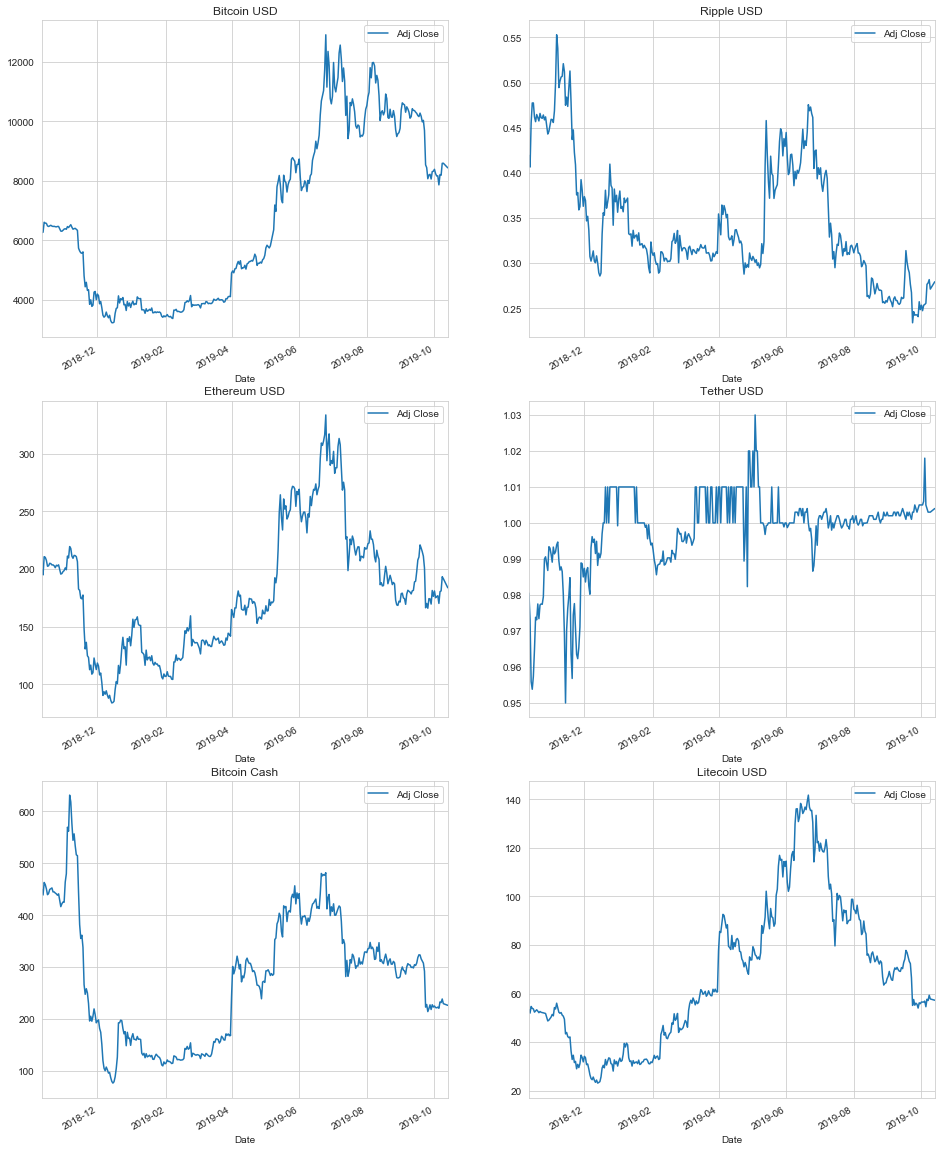

In [116]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(16, 22))
# Bitcoin USD
axes[0,0].set_title('Bitcoin USD');
BTC['Adj Close'].plot(ax=axes[0,0], legend = True)
# Ripple USD
axes[0,1].set_title('Ripple USD');
XRP['Adj Close'].plot(ax=axes[0,1], legend = True)
# Ethereum USD
axes[1,0].set_title('Ethereum USD');
ETH['Adj Close'].plot(ax=axes[1,0], legend = True)
# Tether USD
axes[1,1].set_title('Tether USD');
USDT['Adj Close'].plot(ax=axes[1,1], legend = True)
# Ethereum USD
axes[2,0].set_title('Bitcoin Cash');
BCH['Adj Close'].plot(ax=axes[2,0], legend = True)
# Ethereum USD
axes[2,1].set_title('Litecoin USD');
LTC['Adj Close'].plot(ax=axes[2,1], legend = True)

Overall, we can see that the stock price of all cryptocurrencies has been decreasing since **2019-06**. Moreover, within the year, we can see the value of **BTC** almost increases by 2000, from 6000 to 8000.

Now, we can plot the total volume being traded over time.

In [117]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(16, 22))
# Bitcoin USD
axes[0,0].set_title('Bitcoin USD');
BTC['Volume'].plot(ax=axes[0,0], legend = True)
# Ripple USD
axes[0,1].set_title('Ripple USD');
XRP['Volume'].plot(ax=axes[0,1], legend = True)
# Ethereum USD
axes[1,0].set_title('Ethereum USD');
ETH['Volume'].plot(ax=axes[1,0], legend = True)
# Tether USD
axes[1,1].set_title('Tether USD');
USDT['Volume'].plot(ax=axes[1,1], legend = True)
# Ethereum USD
axes[2,0].set_title('Bitcoin Cash');
BCH['Volume'].plot(ax=axes[2,0], legend = True)
# Ethereum USD
axes[2,1].set_title('Litecoin USD');
LTC['Volume'].plot(ax=axes[2,1], legend = True)

Once again, **Bitcoin USD** has had the total volume being traded over time.

***

## The Moving Average of the Stocks

In particular here, we would like to create moving averages for **10**, **20** and **60** day periods of time.

In [118]:
MA_list = [10,20,60]
for ma in MA_list:
    column_name = "MA %s days" %(str(ma))
    BTC[column_name] = BTC['Adj Close'].rolling(window=ma,center=False).mean()
    XRP[column_name] = XRP['Adj Close'].rolling(window=ma,center=False).mean()
    ETH[column_name] = ETH['Adj Close'].rolling(window=ma,center=False).mean()
    USDT[column_name] = USDT['Adj Close'].rolling(window=ma,center=False).mean()
    BCH[column_name] = BCH['Adj Close'].rolling(window=ma,center=False).mean()
    LTC[column_name] = LTC['Adj Close'].rolling(window=ma,center=False).mean()

For example, for BTC, this reads,

In [119]:
BTC.tail()

High          Low         Open        Close     Volume  \
Date                                                                        
2019-10-06  8326.009766  7798.089844  7868.310059  8215.110352  321239401   
2019-10-07  8354.190430  8126.709961  8215.110352  8191.870117  173213705   
2019-10-08  8697.559570  8132.740234  8191.870117  8593.160156  397912721   
2019-10-09  8672.580078  8466.129883  8593.160156  8596.570312  249998895   
2019-10-13  8488.219727  8312.870117  8317.000000  8441.190430   71474960   

              Adj Close   MA 10 days   MA 20 days   MA 60 days  
Date                                                            
2019-10-06  8215.110352  8199.193945  8779.927490  9851.618799  
2019-10-07  8191.870117  8196.015918  8681.352002  9790.396468  
2019-10-08  8593.160156  8248.805957  8596.958496  9745.389307  
2019-10-09  8596.570312  8277.000977  8517.968018  9696.181152  
2019-10-13  8441.190430  8288.456055  8440.608545  9647.077490

In [120]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(16, 22))
# Bitcoin USD
axes[0,0].set_title('Bitcoin USD');
BTC[['Adj Close','MA 10 days','MA 20 days','MA 60 days']].plot(ax=axes[0,0], legend = True)
# Ripple USD
axes[0,1].set_title('Ripple USD');
XRP[['Adj Close','MA 10 days','MA 20 days','MA 60 days']].plot(ax=axes[0,1], legend = True)
# Ethereum USD
axes[1,0].set_title('Ethereum USD');
ETH[['Adj Close','MA 10 days','MA 20 days','MA 60 days']].plot(ax=axes[1,0], legend = True)
# Tether USD
axes[1,1].set_title('Tether USD');
USDT[['Adj Close','MA 10 days','MA 20 days','MA 60 days']].plot(ax=axes[1,1], legend = True)
# Ethereum USD
axes[2,0].set_title('Bitcoin Cash');
BCH[['Adj Close','MA 10 days','MA 20 days','MA 60 days']].plot(ax=axes[2,0], legend = True)
# Ethereum USD
axes[2,1].set_title('Litecoin USD');
LTC[['Adj Close','MA 10 days','MA 20 days','MA 60 days']].plot(ax=axes[2,1], legend = True)

For all cryptocurrencies, it can be seen that the moving average was increasing from the beginning of the period till June 2019, when it started decreasing.

***

## The Daily Return Average of a Stock

Daily return  can be calculated using the percentage change of the adjusted closing price.

In [121]:
BTC['Daily Return'] = BTC['Adj Close'].pct_change()
XRP['Daily Return'] = XRP['Adj Close'].pct_change()
ETH['Daily Return'] = ETH['Adj Close'].pct_change()
USDT['Daily Return'] = USDT['Adj Close'].pct_change()
BCH['Daily Return'] = BCH['Adj Close'].pct_change()
LTC['Daily Return'] = LTC['Adj Close'].pct_change()

The daily retun plots

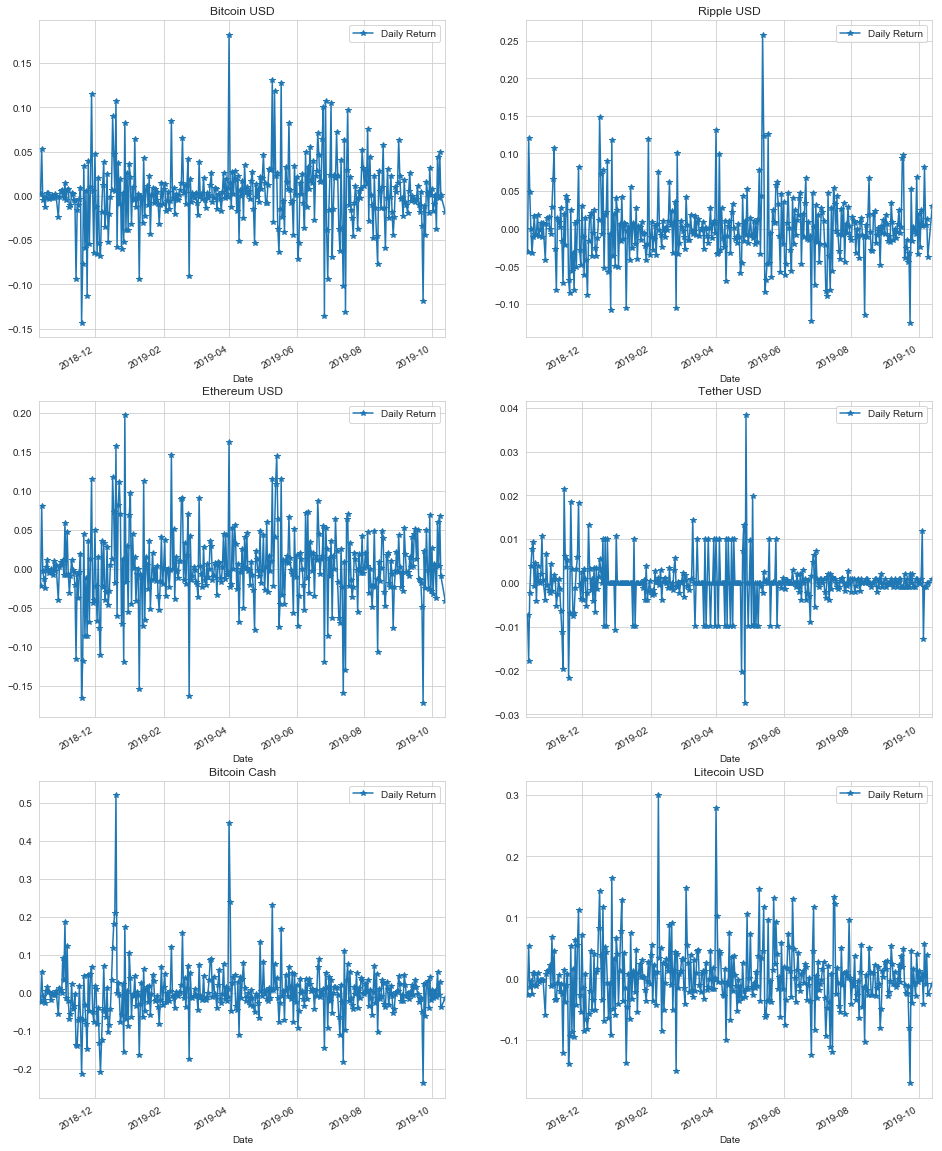

In [122]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(16, 22))
# Bitcoin USD
axes[0,0].set_title('Bitcoin USD');
BTC['Daily Return'].plot(ax=axes[0,0], marker='*', legend=True)
# Ripple USD
axes[0,1].set_title('Ripple USD');
XRP['Daily Return'].plot(ax=axes[0,1], marker='*', legend=True)
# Ethereum USD
axes[1,0].set_title('Ethereum USD');
ETH['Daily Return'].plot(ax=axes[1,0], marker='*', legend=True)
# Tether USD
axes[1,1].set_title('Tether USD');
USDT['Daily Return'].plot(ax=axes[1,1], marker='*', legend=True)
# Ethereum USD
axes[2,0].set_title('Bitcoin Cash');
BCH['Daily Return'].plot(ax=axes[2,0], marker='*', legend=True)
# Ethereum USD
axes[2,1].set_title('Litecoin USD');
LTC['Daily Return'].plot(ax=axes[2,1], marker='*', legend=True)

The daily returns are neither dominantly positive nor negative. Nevertheless, the highest returns took place during June 2019.

***

## The Correlation Between Daily Returns of Different Stocks

First, we need to create a new data frame by reading the **Adj Close** column from all the cryptocurrencies under study. We have,

In [123]:
All_crypto = pdr.DataReader(cryptocurrencies_list,'yahoo',start,end)['Adj Close']

In [124]:
All_crypto.head()

Symbols         BTC-USD  XRP-USD     ETH-USD  USDT-USD     BCH-USD    LTC-USD
Date                                                                         
2018-10-12  6267.270020   0.4194  199.449997    0.9805  449.929993  53.419998
2018-10-13  6277.729980   0.4064  194.990005    0.9732  438.989990  51.939999
2018-10-14  6612.359863   0.4555  210.800003    0.9559  463.109985  54.680000
2018-10-15  6583.049805   0.4774  210.220001    0.9538  458.989990  53.900002
2018-10-16  6574.520020   0.4774  207.600006    0.9574  450.869995  53.669998

In [125]:
All_crypto.tail()

Symbols         BTC-USD  XRP-USD     ETH-USD  USDT-USD     BCH-USD    LTC-USD
Date                                                                         
2019-10-06  8215.110352   0.2766  180.490005     1.004  232.970001  57.639999
2019-10-07  8191.870117   0.2781  181.089996     1.003  231.699997  57.139999
2019-10-08  8593.160156   0.2818  193.429993     1.003  238.550003  59.320000
2019-10-09  8596.570312   0.2713  191.729996     1.003  229.559998  57.770000
2019-10-13  8441.250000   0.2794  183.830002     1.004  226.330002  57.250000

The returns can be analyzed using the percentage change from the **adj Close**.

In [126]:
All_returns = All_crypto.pct_change()

In [127]:
All_returns.tail()

Symbols      BTC-USD   XRP-USD   ETH-USD  USDT-USD   BCH-USD   LTC-USD
Date                                                                  
2019-10-06  0.044076  0.082160  0.060085 -0.000995  0.055787  0.056258
2019-10-07 -0.002829  0.005423  0.003324 -0.000996 -0.005451 -0.008675
2019-10-08  0.048986  0.013305  0.068143  0.000000  0.029564  0.038152
2019-10-09  0.000397 -0.037261 -0.008789  0.000000 -0.037686 -0.026129
2019-10-13 -0.018068  0.029856 -0.041204  0.000997 -0.014070 -0.009001

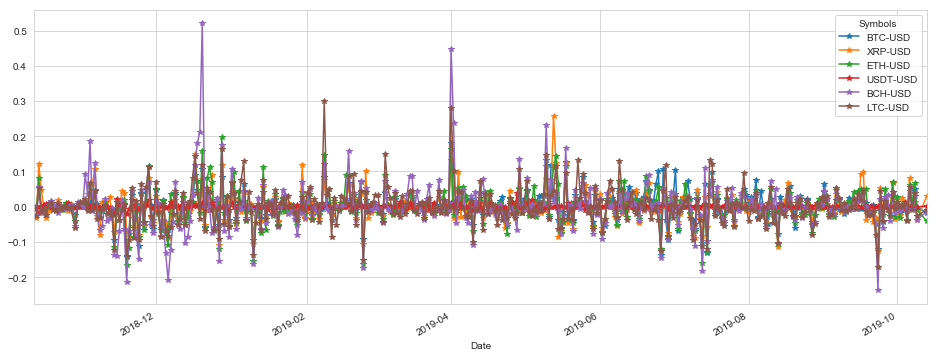

In [128]:
All_returns.plot(marker='*',legend=True,figsize=(16,6))

We can see that most high returns happen around the same time. However, it is needed to analyze this more carefully. Using a *joinplot*, we can investigate the correlation between different cryptocurrencies. For example, we can plot a joinplot for **Bitcoin USD** and **Ripple USD**, and **Bitcoin USD** and **Ethereum USD**;

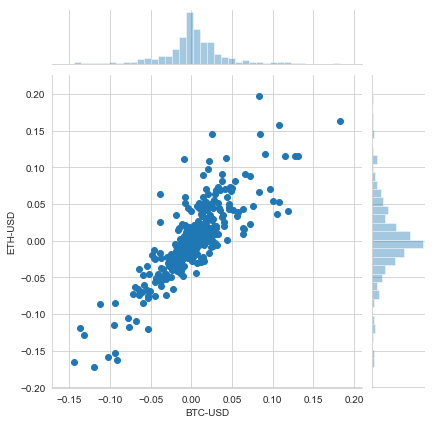

In [129]:
# Bitcoin USD and Ripple USD
sns.jointplot('BTC-USD','XRP-USD', All_returns, kind='scatter')
# Bitcoin USD and Ethereum USD
sns.jointplot('BTC-USD','ETH-USD', All_returns, kind='scatter')

There seems to be a minor positive correlation between each two pairs.

Now, we can use the pairplot tool to visualize all.

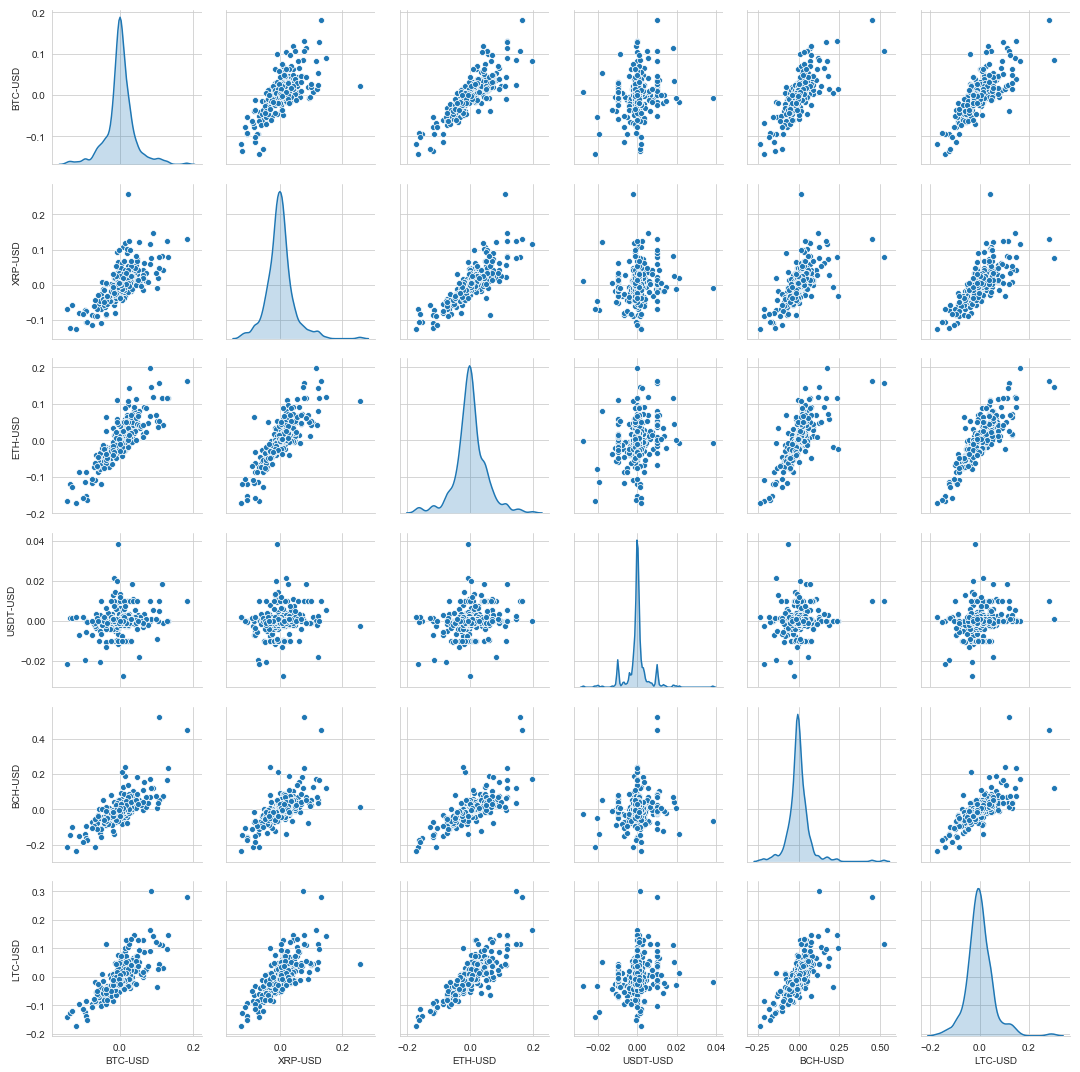

In [130]:
# Remove missing values
All_returns=All_returns.dropna()
# plot
sns.pairplot(All_returns,diag_kind='kde')

Nonetheless, the correlation matrix and plot are always convenient to see numerical values for correlations.

In [132]:
# Correlation Matrix
Cor_matrix = All_returns.corr()
Cor_matrix

Symbols    BTC-USD   XRP-USD   ETH-USD  USDT-USD   BCH-USD   LTC-USD
Symbols                                                             
BTC-USD   1.000000  0.708725  0.833250  0.185516  0.745008  0.758798
XRP-USD   0.708725  1.000000  0.813325  0.141839  0.651770  0.727110
ETH-USD   0.833250  0.813325  1.000000  0.214016  0.748468  0.829136
USDT-USD  0.185516  0.141839  0.214016  1.000000  0.134160  0.200209
BCH-USD   0.745008  0.651770  0.748468  0.134160  1.000000  0.741307
LTC-USD   0.758798  0.727110  0.829136  0.200209  0.741307  1.000000

In [133]:
plt.figure(figsize = (9,7))
ax=sns.heatmap(Cor_matrix, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, cmap="Greens")

Here, darker shades of green represent a higher correlation.

In [135]:
data=All_returns
plt.figure(figsize=(8,6))
plt.scatter(data.mean(),data.std(),s=25)
plt.xlabel('Expected Return')
plt.ylabel('Risk')

# adding annotatios
for label,x,y in zip(data.columns,data.mean(),data.std()):
    plt.annotate(label, xy=(x,y),xytext=(-100,0), textcoords = 'offset points', ha = 'right', va = 'bottom',
                 arrowprops=dict(facecolor='DarkGreen', shrink=0.001))

The current trend for cryptocurrencies seems to output a value between 0 and 0.002. We would like to identify a crypto with high return and low risk!

In [143]:
qt = All_returns['BTC-USD'].quantile(0.05)

In [144]:
qt_pct = abs(All_returns['BTC-USD'].quantile(0.05))*100
print(qt_pct)

6.229191273631312


In [145]:
print("""The 0.05 empirical quantile of daily returns is at {0:.2f}.
      This means that with 95% confidence, the worst daily loss will not exceed {0:.2f}% (of the investment)."""
      .format(qt,qt_pct))

The 0.05 empirical quantile of daily returns is at -0.06.
      This means that with 95% confidence, the worst daily loss will not exceed -0.06% (of the investment).


## Predicting future behaviors

To predict future behaviors, we can implement the [Monte Carlo method](https://en.wikipedia.org/wiki/Monte_Carlo_method) (also see this [link](https://www.scratchapixel.com/lessons/mathematics-physics-for-computer-graphics/monte-carlo-methods-mathematical-foundations/variance-and-standard-deviation) and this [link](https://www.investopedia.com/terms/m/montecarlosimulation.asp)).

Now conisder **Bitcoin USD**. We have,

In [146]:
# consider a year
days = 365
# Delta t
dt = 1/365
# mean
mu = All_returns.mean()['BTC-USD']
# standard deviation
sigma = All_returns.std()['BTC-USD']

Defining a Monte Carlo function fo the Stock price.

In [147]:
def stock_monte_carlo(start_price,days,mu,sigma):
    '''Function takes in stock price, number of days to run, mean and standard deviation values'''
    price = np.zeros(days)
    price[0] = start_price
    
    shock = np.zeros(days)
    drift = np.zeros(days)
    
    for x in range(1,days):
        
        #Shock and drift formulas taken from the Monte Carlo formula
        shock[x] = np.random.normal(loc=mu*dt,scale=sigma*np.sqrt(dt))
        
        drift[x] = mu * dt
        
        #New price = Old price + Old price*(shock+drift)
        price[x] = price[x-1] + (price[x-1] * (drift[x]+shock[x]))
        
    return price

Note that,

In [148]:
BTC.tail()

High          Low         Open        Close     Volume  \
Date                                                                        
2019-10-06  8326.009766  7798.089844  7868.310059  8215.110352  321239401   
2019-10-07  8354.190430  8126.709961  8215.110352  8191.870117  173213705   
2019-10-08  8697.559570  8132.740234  8191.870117  8593.160156  397912721   
2019-10-09  8672.580078  8466.129883  8593.160156  8596.570312  249998895   
2019-10-13  8488.219727  8312.870117  8317.000000  8441.190430   71474960   

              Adj Close   MA 10 days   MA 20 days   MA 60 days  Daily Return  
Date                                                                          
2019-10-06  8215.110352  8199.193945  8779.927490  9851.618799      0.044076  
2019-10-07  8191.870117  8196.015918  8681.352002  9790.396468     -0.002829  
2019-10-08  8593.160156  8248.805957  8596.958496  9745.389307      0.048986  
2019-10-09  8596.570312  8277.000977  8517.968018  9696.181152      0.000397  
2019-10-13  8441.190430  8288.456055  8440.608545  9647.077490     -0.018075

In [156]:
start_price = BTC['Open'][-1]

fig = plt.figure(figsize = (14, 8))
for run in range(100):
    plt.plot(stock_monte_carlo(start_price,days,mu,sigma))

plt.xlabel('Days')
plt.ylabel('Price')
plt.title('Monte Carlo Analysis for Bitcoin USD')

Text(0.5,1,'Monte Carlo Analysis for Bitcoin USD')

In [157]:
runs = 10000

simulations = np.zeros(runs)

for run in range(runs):
    simulations[run] = stock_monte_carlo(start_price,days,mu,sigma)[days-1]

Text(0.5,1,'Final price distribution for BTC after 365 days')

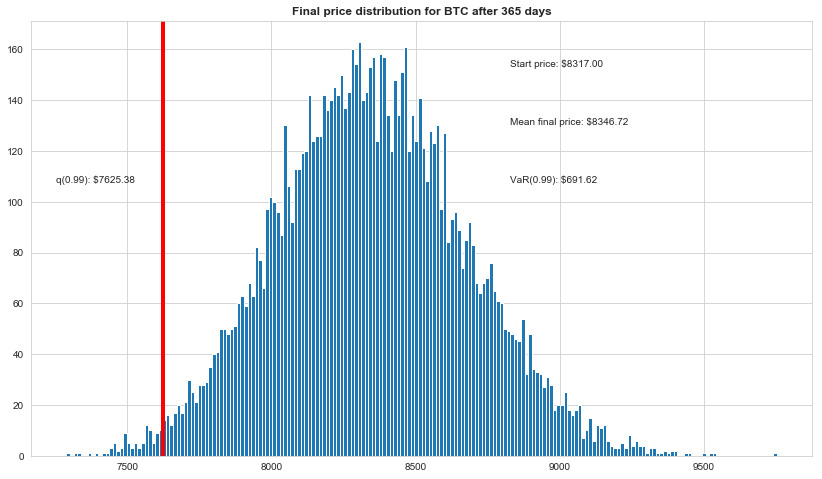

In [159]:
fig = plt.figure(figsize = (14, 8))
q = np.percentile(simulations,1)
plt.hist(simulations,bins=200)
plt.figtext(0.6,0.8,s="Start price: $%.2f" %start_price)
plt.figtext(0.6,0.7,"Mean final price: $%.2f" % simulations.mean())
plt.figtext(0.6,0.6,"VaR(0.99): $%.2f" % (start_price -q,))
plt.figtext(0.15,0.6, "q(0.99): $%.2f" % q)
plt.axvline(x=q, linewidth=4, color='r')
plt.title(u"Final price distribution for BTC after %s days" %days, weight='bold')

Seems like BTC's overall price is going down!